# Note
    
    About 65% I don't understand what I'm doing especially after splitting

In [1]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook',ticks=True, grid=False)

In [2]:
df = pd.read_csv(r'dataset/cancer_data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


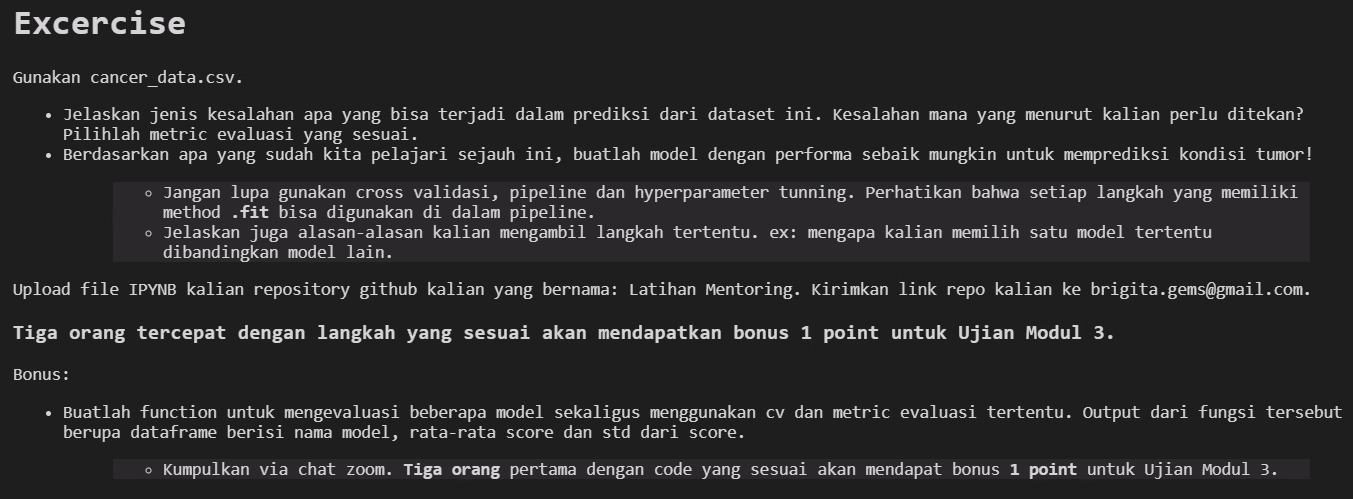

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop(columns = ['id','Unnamed: 32'], inplace = True)

# Metric Evaluasi

    M = Malignant = Cancerous = 1
    B = Benign = Not Cancerous = 0
    
    TP = Pasien dinyatakan kanker, sehingga bisa mendapatkan perawatan yang sesuai
    TN = Pasien dinyatakan negatif kanker, sehingga tidak perlu mengeluarkan biaya 
    yang tidak diperlukan
    FP = Pasien dinyatakan kanker padahal aktualnya negatif kanker, menyebabkan 
    pengeluaran biaya yang tidak diperlukan untuk perawatan bahkan bisa menyebabkan efek 
    samping karena perawatan tersebut (Kemoterapi ada efek samping)
    FN = Pasien dinyatakan tidak kanker padahal aktualnya positif kanker, bisa menyebakan 
    kanker makin parah dikarenakan tidak mendapatkan perawatan
    
Sehingga yang ingin ditekankan adalah FN karena bisa menyebabkan kematian, artinya metric yang akan digunakan adalah Recall

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, plot_roc_curve, plot_precision_recall_curve

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [7]:
x = df.drop(columns = 'diagnosis')
y = np.where(df['diagnosis'] == 'M', 1, 0)

In [8]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 2020)

In [9]:
logreg = LogisticRegression(solver = 'liblinear')
tree = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
def model_evaluation_cv(model, metrics):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train_val, y_train_val, scoring = metrics, cv = skfold)
    return model_cv

In [11]:
def print_result(model_cv):
    print('score : ', model_cv)
    print('mean score : ', model_cv.mean())
    print('std score : ', model_cv.std())

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 2020)
metrics = 'recall'
model_cv = model_evaluation_cv(model, metrics)
print_result(model_cv)

score :  [0.94117647 0.88235294 0.94117647 0.85294118 1.        ]
mean score :  0.9235294117647058
std score :  0.051281164041654996


In [50]:
model = KNeighborsClassifier(n_neighbors = 5)
metrics = 'recall'
model_cv = model_evaluation_cv(model, metrics)
print_result(model_cv)

score :  [0.85294118 0.91176471 0.94117647 0.79411765 0.94117647]
mean score :  0.8882352941176471
std score :  0.057031527734309764


In [14]:
model = LogisticRegression(solver = 'liblinear')
metrics = 'recall'
model_cv = model_evaluation_cv(model, metrics)
print_result(model_cv)

score :  [0.88235294 0.85294118 0.97058824 0.85294118 0.97058824]
mean score :  0.9058823529411765
std score :  0.0539126552347746


Yang paling baik adalah Decision Tree Classifier, tapi untuk kestabilan model, paling rendah KNN, akan saya lakukan 2 test, based on highest mean dan highest std

# Model Performance

In [15]:
tree = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

In [16]:
estimator = Pipeline([
    ('model', tree)
])

In [17]:
estimator.fit(x_train_val, y_train_val)
y_pred = estimator.predict(x_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



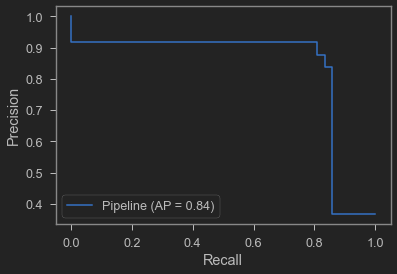

In [19]:
plot_precision_recall_curve(estimator, x_test, y_test)

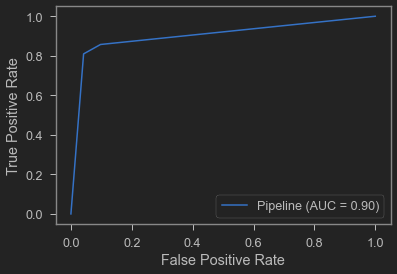

In [20]:
plot_roc_curve(estimator, x_test, y_test)

In [21]:
tree = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
estimator = Pipeline([
    ('model', tree)
])

In [22]:
hyperparam_space = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [i for i in range(3, 11)],
    'model__min_samples_split' : [i for i in range(2, 11)],
    'model__min_samples_leaf' : [i for i in range(1, 11)],
}

In [23]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'recall', n_jobs = -1)

In [24]:
grid_search.fit(x_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=5))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19, 20],
                         'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20]

In [25]:
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.9470588235294116
best score  {'model__criterion': 'entropy', 'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 9}


Before Tuning

In [30]:
tree = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
estimator = Pipeline([
    ('model', tree)
])
estimator.fit(x_train_val, y_train_val)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [31]:
y_pred = estimator.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [32]:
recall_score(y_test, y_pred)

0.8333333333333334

After Tuning

In [36]:
grid_search.best_estimator_.fit(x_train_val, y_train_val)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_split=9))])

In [37]:
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [38]:
recall_score(y_test, y_pred)

0.8333333333333334